In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sample.csv')
df['def'] = [0 if i == '0' else 1 for i in df['def']]

In [3]:
df.head()

,id,def_year,data_year,class,def,X1,X2,X3,X4,X5,...,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,7099152057,0,2019,1,0,0.042707,0.055474,3.622877569,0.003530,0.527003784,...,0.042478,1.298074538,0.115887,0.10120602,-3.004870,0.022816971,-16.818141,1.544893932,1.355985249,22.41510277
1,2905486262,0,2019,1,0,0.707910,0.271912,0.410450789,0.008796,0.262616226,...,0.268073,1.190000711,0.184163,1.457792145,0.677002,0.030273371,0.864823,3.112264973,4.07409499,0.412608118
2,1709558193,0,2019,1,0,0.573604,0.089757,0.697690037,0.130357,0,...,0.041300,1.866089727,0.177110,0.999388768,0.355998,0.325731223,0.410924,1.654442295,4.376420743,0.743364009
3,2702408985,0,2019,2,0,0.100933,0.013752,8.907542579,0.043468,0,...,0.008595,3.309675835,0.271648,0.814258399,-0.044806,0.048347446,-0.381995,0.957115542,3.681234635,8.907542579
4,2874968203,0,2019,3,0,0.810743,0.686554,0.013895064,0.329668,0.259254397,...,0.516492,5.75630858,0.001957,0.501904762,0.555931,29.264,0.292241,37.832,30.4152381,0.233437083


In [4]:
df.id.nunique()

13582

Проверим наличие пропусков в данных

In [5]:
df.isnull().sum()

id           0
def_year     0
data_year    0
class        0
def          0
X1           0
X2           0
X3           0
X4           0
X5           0
X6           0
X7           0
X8           0
X9           0
X10          0
X11          0
X12          0
X13          0
X14          0
X15          0
X16          0
X17          0
X18          0
X19          0
dtype: int64

Некоторые колонки имеют неправильный тип данных и значения в этих колонках имеют формат даты. Удалим строки с такими данными, а колонки приведем к типу `float`

In [6]:
index_to_drop = []
object_columns = [i for i in df.columns if df[i].dtype == 'O']

for col in object_columns:
    for i in df.index:
        try:
            float(df.loc[i][col])
        except:
            print(i, df.loc[i][col], end=' ')
            index_to_drop += [i]

414 16-сент. 882 июл.-38 922 февр.-76 2216 мар.-95 3173 июл.-75 3750 сент.-56 3801 сент.-75 4356 апр.-15 5395 авг.-58 5469 12-сент. 5919 апр.-25 6243 мая-71 6766 23-янв. 6974 нояб.-87 8243 14-авг. 8556 5-июл. 9014 2-февр. 9340 8-мая 9718 2-янв. 9944 3-дек. 10135 окт.-75 10736 16-июн. 11808 9-июл. 12270 февр.-75 12384 мая-25 1085 дек.-75 3074 мар.-32 5038 1-февр. 6465 июл.-25 8804 мая-25 8843 июл.-75 9568 9-апр. 9820 мая-25 10956 мар.-35 11075 1-янв. 11205 11-мая 11953 нояб.-14 12460 5-мая 13359 авг.-81 13384 мая-97 1569 мар.-44 1760 авг.-25 3149 янв.-71 3466 3-февр. 4556 10-дек. 8834 авг.-65 8941 февр.-29 11737 окт.-92 11840 апр.-75 348 февр.-68 409 янв.-44 660 мар.-64 4318 9-мар. 5613 7-сент. 6277 янв.-31 8844 2-мая 9977 4-мая 561 9-янв. 920 янв.-25 1569 мар.-24 1671 окт.-24 2196 янв.-75 2463 авг.-72 2800 апр.-75 2929 5-июл. 3146 дек.-75 3530 30-апр. 4449 2-сент. 4513 29-авг. 7230 мая-94 9433 янв.-45 9580 2-мая 10277 февр.-34 11268 25-июл. 1218 5-мая 2215 3-мая 2571 мая-25 3036 2-мая 

In [7]:
len(index_to_drop)

142

In [8]:
df.drop(index_to_drop, inplace=True)
df[object_columns] = df[object_columns].apply(pd.to_numeric)

In [9]:
df.dtypes

id             int64
def_year       int64
data_year      int64
class          int64
def            int64
X1           float64
X2           float64
X3           float64
X4           float64
X5           float64
X6           float64
X7           float64
X8           float64
X9           float64
X10          float64
X11          float64
X12          float64
X13          float64
X14          float64
X15          float64
X16          float64
X17          float64
X18          float64
X19          float64
dtype: object

Т.к нас интересует вероятность выхода в дефолт заемщика в течение одного года после даты наблюдения, данные по выходу в дефолт полученые после нескольких (>1) лет после отчетности не релевантны, удалим их.

In [10]:
df = df[df.def_year - df.data_year <= 1]

In [11]:
df['def'].value_counts()

0    12423
1      614
Name: def, dtype: int64

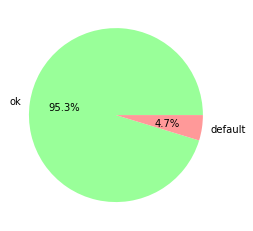

In [12]:
plt.pie(df['def'].value_counts(), autopct='%1.1f%%', labels = ['ok', 'default'],
        colors=['#99ff99', '#ff9999']);

Как видно из диаграммы мы имеем дело с проблемой бинарной классификации и при этом классы сильно несбалансированы. В связи с этим следует следить за разделением на тренировочную и тестовую выборки, чтобы не допустить отсутствия экземпляров класса `1` в одной из них.

### Определение коррреляции между целевой переменной и фичами в датасете

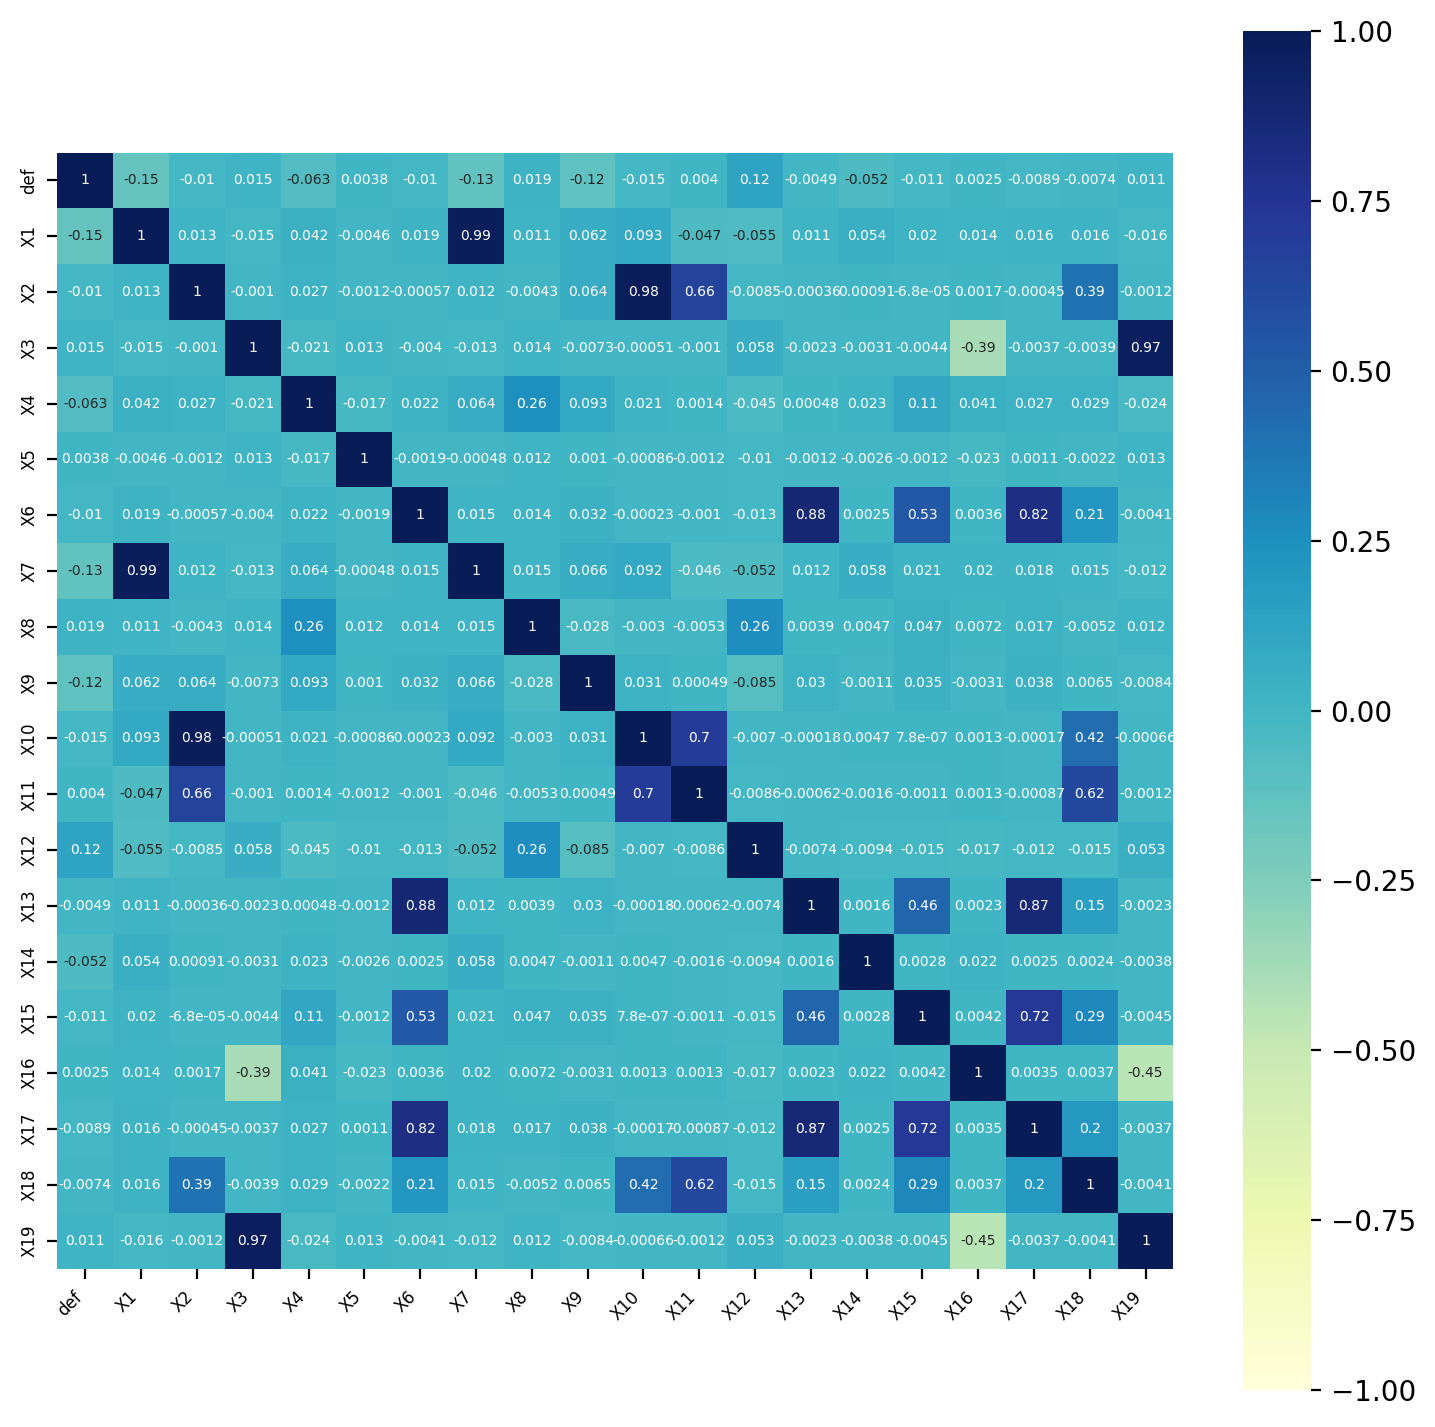

In [13]:
df = df.drop(['id', 'def_year', 'data_year', 'class'], axis = 1)
df_corr = df.corr()
plt.figure(figsize=(9, 9), dpi=200)
ax = sns.heatmap(
    df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap="YlGnBu",
    square=True, annot = True, annot_kws={"fontsize":5})
ax.set_yticklabels(ax.get_xticklabels(),size=6)
ax.set_xticklabels(ax.get_xticklabels(),size=6, rotation=45,horizontalalignment='right');

#### Поиск колонок которые сильно коррелируют друг с другом и их удаление. Порог установлен на `0.6`

In [14]:
def correlation(dataset, threshold : float)-> list:
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return list(col_corr)

In [15]:
strongly_corr_columns = correlation(df, 0.6)

In [16]:
print(strongly_corr_columns)

['X19', 'X17', 'X10', 'X11', 'X7', 'X13']


In [17]:
df.drop(strongly_corr_columns, axis=1, inplace=True)

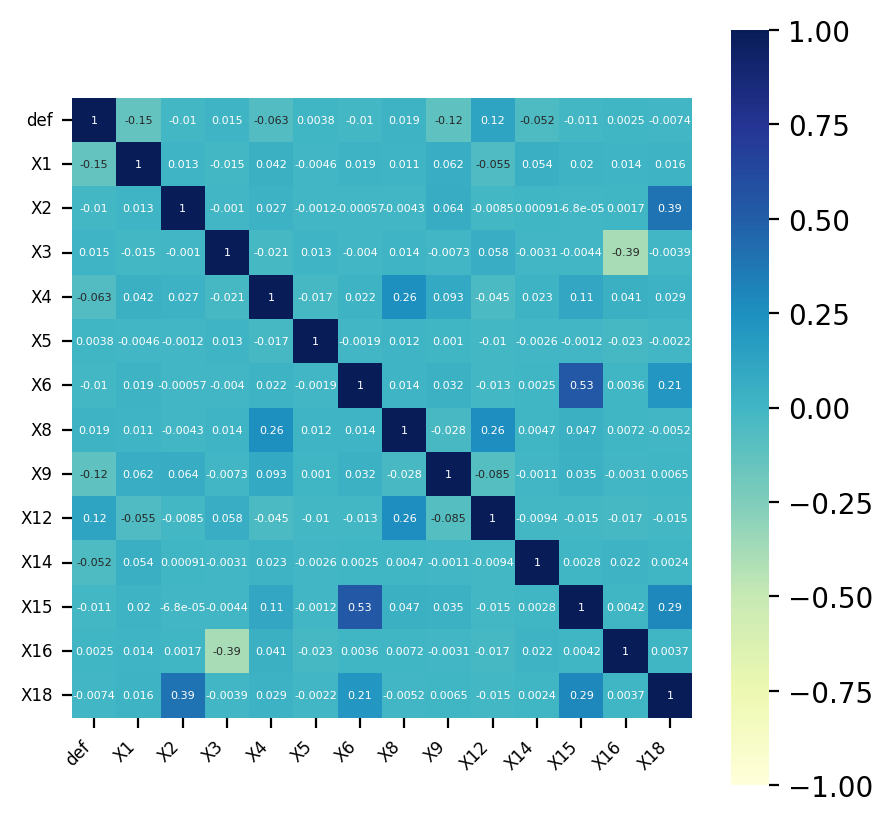

In [18]:
df_corr_after_drop = df.corr()
plt.figure(figsize=(5, 5), dpi=200)
ax = sns.heatmap(
    df_corr_after_drop, 
    vmin=-1, vmax=1, center=0,
    cmap="YlGnBu",
    square=True, annot = True, annot_kws={"fontsize":4})
ax.set_yticklabels(ax.get_xticklabels(),size=6)
ax.set_xticklabels(ax.get_xticklabels(),size=6, rotation=45,horizontalalignment='right');

In [19]:
df.head()

,def,X1,X2,X3,X4,X5,X6,X8,X9,X12,X14,X15,X16,X18
0,0,0.042707,0.055474,3.622878,0.003530,0.527004,0.044613,0.002720,0.042736,0.115887,-3.004870,0.022817,-16.818141,1.355985
1,0,0.707910,0.271912,0.410451,0.008796,0.262616,2.423607,0.007392,0.228497,0.184163,0.677002,0.030273,0.864823,4.074095
2,0,0.573604,0.089757,0.697690,0.130357,0.000000,1.345236,0.069856,0.048099,0.177110,0.355998,0.325731,0.410924,4.376421
3,0,0.100933,0.013752,8.907543,0.043468,0.000000,0.112264,0.013133,0.004155,0.271648,-0.044806,0.048347,-0.381995,3.681235
4,0,0.810743,0.686554,0.013895,0.329668,0.259254,4.283810,0.057271,0.119270,0.001957,0.555931,29.264000,0.292241,30.415238


### X & y split

In [20]:
y = df['def']
X = df.drop(['def'], axis = 1)
X_columns = X.columns

#### Проверим статистическую значимость каждого дескриптора

In [21]:
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit(maxiter=1000)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.197320
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                    def   No. Observations:                13037
Model:                          Logit   Df Residuals:                    13024
Method:                           MLE   Df Model:                           12
Date:                Fri, 19 Nov 2021   Pseudo R-squ.:                -0.03920
Time:                        16:18:17   Log-Likelihood:                -2572.5
converged:                       True   LL-Null:                       -2475.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -8.8752      0.284    -31.215      0.000      -9.432      -8.318
X2            -0.5342      0

### Stratified Train/Test split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [23]:
y_train.value_counts(1)

0    0.952951
1    0.047049
Name: def, dtype: float64

In [24]:
y_test.value_counts(1)

0    0.952761
1    0.047239
Name: def, dtype: float64

Как видно, соотношение классов в тренировочной и тестовой выборке примерно равное.

### Scaling
Здесь важно заметить что фитить скейлер можно только на тренировочной выборке, а тестовую только трансформировать, чтобы исключить утечку информации.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, plot_confusion_matrix, roc_auc_score, roc_curve, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Несбалансированность классов и специфика бизнес задачи также приводит  к мысли что наилучшей метрикой будет `F1` мера

$$ F1 = \frac{2TP}{2TP + FP + FN} $$

F1 мера является гармоническим средним от `precision` и `recall` и назначает сильный штраф модели при неверной классификации  экземпляров минорного класса. Иными словами, с одной стороны, нам важно точно предсказать все экземпляры с дефолтом `(1)` при этом оставляя модели возможность предсказать дефолт и для часть бездефолтных компаний, но не давать ей злоупотреблять этим.

Мысли в слух:

*Не так страшно, если у нас будет чуть больше единиц `(1)`, чем есть на самом деле, чем потерять какие то из них. Для бизнеса более допустимо недополучить прибыль, чем понести убытки.*

---

In [27]:
def plot_roc_curve(clf, X_test, y_test, alg_name=None):
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
    r_a_score = roc_auc_score(y_test, y_pred_proba)
    plt.figure(figsize=(7, 7), dpi=100)
    plt.title(f'{alg_name} ROC curve', fontsize=14)
    plt.plot(fpr, tpr, label=f'ROC AUC score: {r_a_score:.3f}')
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.legend(fontsize =12)
    plt.xticks(np.arange(0, 1, step=0.1))
    plt.yticks(np.arange(0, 1, step=0.1))
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.grid(alpha=.5)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.show()

def print_results(y_pred_train, y_pred_test, y_true_train = y_train, y_true_test = y_test):
    print('Recall')
    print(f'Train :  {recall_score(y_true_train, y_pred_train):.3f}')
    print(f'Test  :  {recall_score(y_true_test, y_pred_test):.3f}\n')
    print('F1 score')
    print(f'Train :  {f1_score(y_true_train, y_pred_train):.3f}')
    print(f'Test  :  {f1_score(y_true_test, y_pred_test):.3f}\n')

# Предсказательные модели

## 1. Logistic regression

Для модели Логистической регрессии будет оптимизирован параметр `C` отвечающий за регуляризацию и помогающий предотвратить переобучение. Вторым будет параметр `max_iter` отвечающий за максимально возможное количество итераций до достижения сходимости.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [29]:
skf = StratifiedKFold(n_splits=5)
lr = LogisticRegression(tol=1e-5, class_weight='balanced', max_iter=5000, multi_class='ovr')
parameters = {'C' : np.logspace(-2, 4, 7)}

In [30]:
grid_search = GridSearchCV(lr, parameters, n_jobs=-1, scoring='f1', cv=skf)
grid_search = grid_search.fit(X, y)
clf_logreg = grid_search.best_estimator_
clf_logreg.fit(X_train, y_train)
y_train_pred = clf_logreg.predict(X_train)
y_test_pred = clf_logreg.predict(X_test)
y_pred_proba_logred = clf_logreg.predict_proba(X_test)[:,1]

In [31]:
logreg_gs_std = grid_search.cv_results_['std_test_score'][1]

#### Оценим предсказательную силу модели

In [32]:
print_results(y_train_pred, y_test_pred)
print(f"\n{logreg_gs_std * 100:.2f} % Стандартное отклонения кроссвалидации")

Recall
Train :  0.713
Test  :  0.714

F1 score
Train :  0.198
Test  :  0.200


1.88 % Стандартное отклонения кроссвалидации


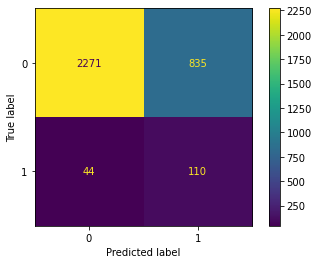

In [33]:
plot_confusion_matrix(clf_logreg, X_test, y_test);

#### Построим также кривую ROC

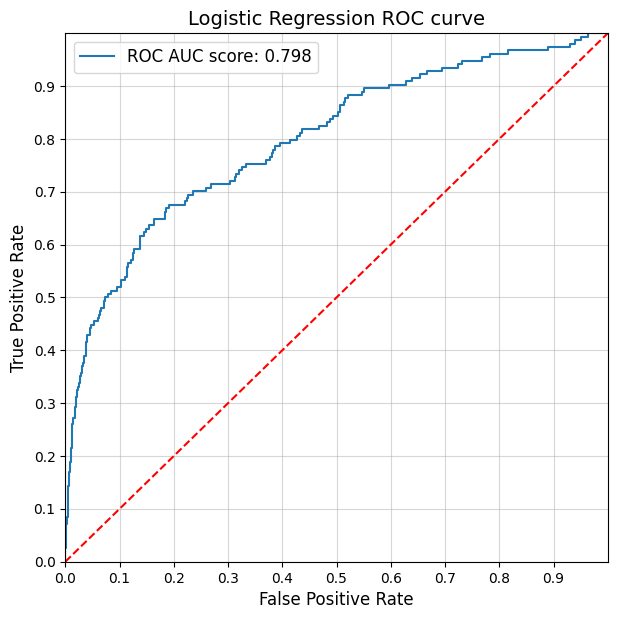

In [34]:
plot_roc_curve(clf_logreg, X_test, y_test, 'Logistic Regression')

#### Определим коэффициенты полученной модели

<AxesSubplot:title={'center':'Coefficients'}>

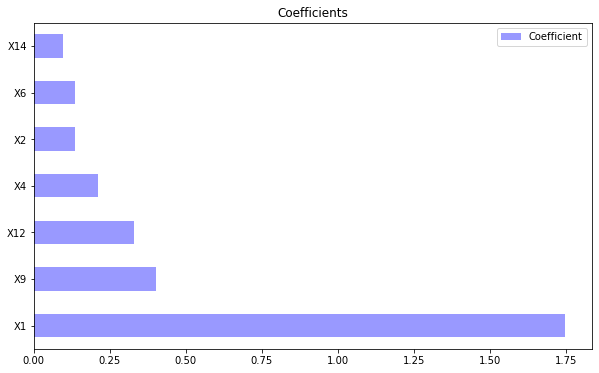

In [35]:
df_logreg_coeff = pd.DataFrame({'Coefficient' : abs(clf_logreg.coef_[0])}, index = X_columns).sort_values(by='Coefficient', ascending=False)
df_logreg_coeff.head(7).plot(kind='barh',figsize=(10,6), title='Coefficients',
                            color=['b'], alpha=.4)

### Для 7 самых важных дескрипторов определим взаимную корреляцию

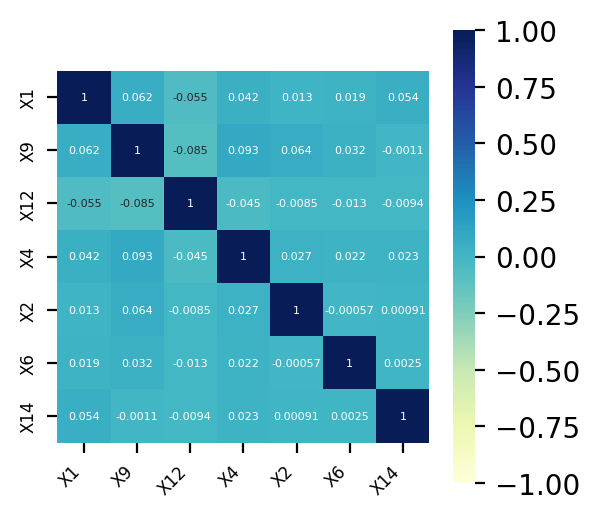

In [36]:
corr = df[df_logreg_coeff.index[:7]].corr()
plt.figure(figsize=(3, 3), dpi=200)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="YlGnBu",
    square=True, annot = True, annot_kws={"fontsize":4})
ax.set_yticklabels(ax.get_xticklabels(),size=6)
ax.set_xticklabels(ax.get_xticklabels(),size=6, rotation=45,horizontalalignment='right');

---

## 2. Random Forest model

Модель RF будет оптимизирована относительно максимальной глубины каждого отдельного дерева `max_depth` в ансамбле и общего количества деревьев `n_estimators`.

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_grid_search = GridSearchCV(
    estimator = rf_clf,
    param_grid={'criterion' : ['gini', 'entropy'],
                'max_depth' : [i for i in range(2, 16, 2)],
                'n_estimators' : [10, 20, 50, 100]},
    scoring='f1',
    n_jobs=-1,
    verbose=3)

rf_grid_search.fit(X_train, y_train);
rf_clf = rf_grid_search.best_estimator_

Fitting 5 folds for each of 56 candidates, totalling 280 fits


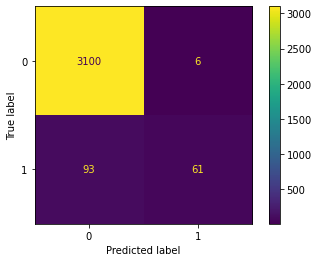

In [38]:
rf_gs_std = rf_grid_search.cv_results_['std_test_score'][1]

rf_clf.fit(X_train, y_train)
y_train_pred_rf = rf_clf.predict(X_train) 
y_test_pred_rf = rf_clf.predict(X_test)
plot_confusion_matrix(rf_clf, X_test, y_test);

In [39]:
print_results(y_train_pred_rf, y_test_pred_rf);

print(f'\nStd.Cross: {rf_gs_std * 100:.2f}%')

Recall
Train :  0.502
Test  :  0.396

F1 score
Train :  0.669
Test  :  0.552


Std.Cross: 4.19%


<AxesSubplot:>

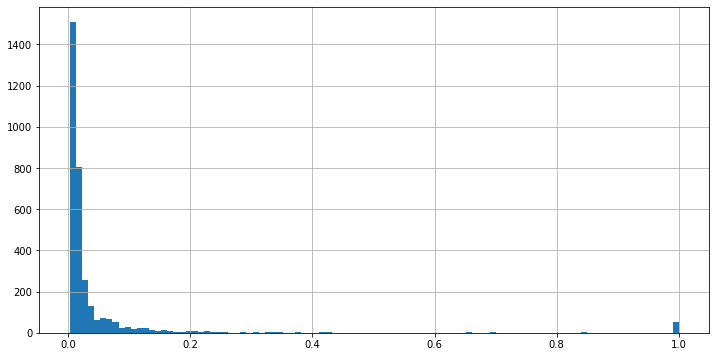

In [40]:
y_proba = rf_clf.predict_proba(X_test)[:, 1]
plt.figure(figsize=(12, 6))
pd.Series(y_proba).hist(bins=100)

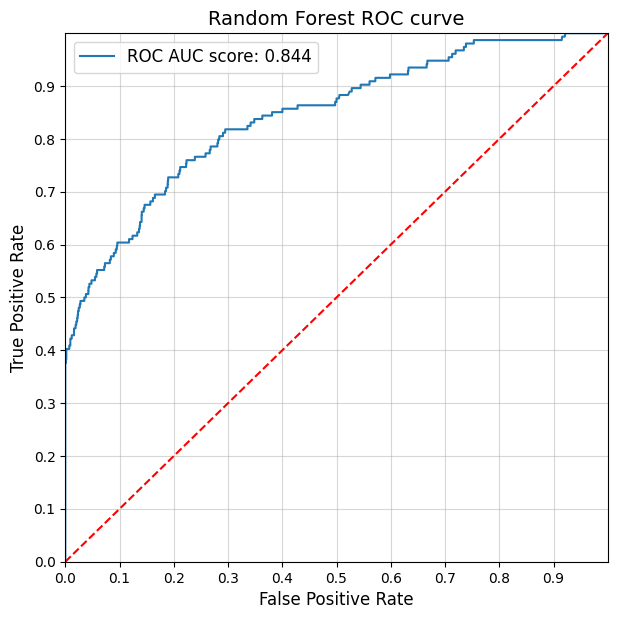

In [41]:
plot_roc_curve(rf_clf, X_test, y_test, 'Random Forest')

#### Опеределим важность дескрипторов

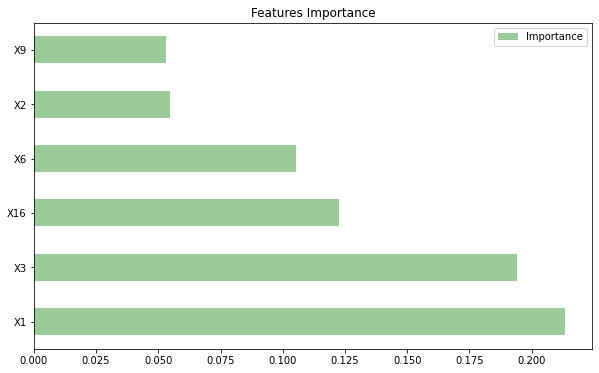

In [54]:
rf_feature_importance = pd.DataFrame({'Importance': rf_clf.feature_importances_}, index=X_columns)\
.sort_values(by='Importance', ascending=False)
rf_feature_importance[:6].plot(kind='barh',
                                  figsize=(10,6),
                                  title='Features Importance', color=['g'], alpha=.4)
plt.show()

## 3. XGBoost model

In [59]:
from xgboost import XGBClassifier

xgb_clf =  XGBClassifier(silent=True, verbosity = 0, use_label_encoder=False)

param_grid={'max_depth' : [i for i in range(2, 16, 2)],
            'n_estimators' : [10, 20, 50],
            'learning_rate' : [0.01, 0.05, 0.1]}
          
xgb_grid_search = GridSearchCV(estimator=xgb_clf,
                               param_grid=param_grid,
                               scoring='f1',
                               n_jobs=-1)

xgb_grid_search.fit(X_train, y_train);

In [60]:
xgb_clf = xgb_grid_search.best_estimator_

xgb_gs_std = xgb_grid_search.cv_results_['std_test_score'][1]

In [61]:
xgb_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

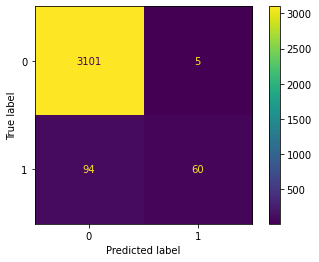

In [62]:
xgb_clf.fit(X_train, y_train)
y_train_pred_xgb = xgb_clf.predict(X_train) 
y_test_pred_xgb = xgb_clf.predict(X_test)
plot_confusion_matrix(xgb_clf, X_test, y_test);

In [63]:
print_results(y_train_pred_xgb, y_test_pred_xgb)

print(f'\n{xgb_gs_std * 100:.2f}% Стандартное отклонения кроссвалидации')

Recall
Train :  0.498
Test  :  0.390

F1 score
Train :  0.661
Test  :  0.548


4.19% Стандартное отклонения кроссвалидации


#### Определяем порог

<AxesSubplot:>

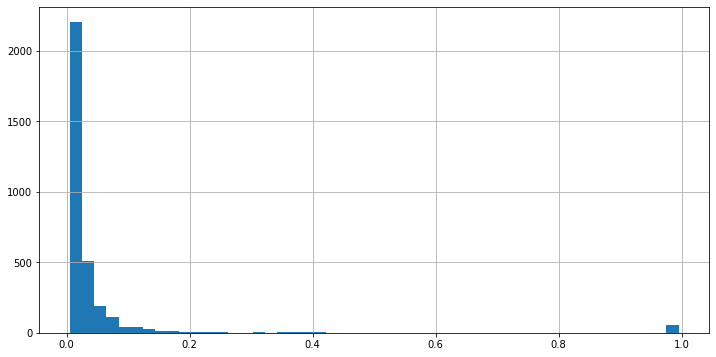

In [64]:
y_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]
plt.figure(figsize=(12, 6))
pd.Series(y_proba_xgb).hist(bins=50)

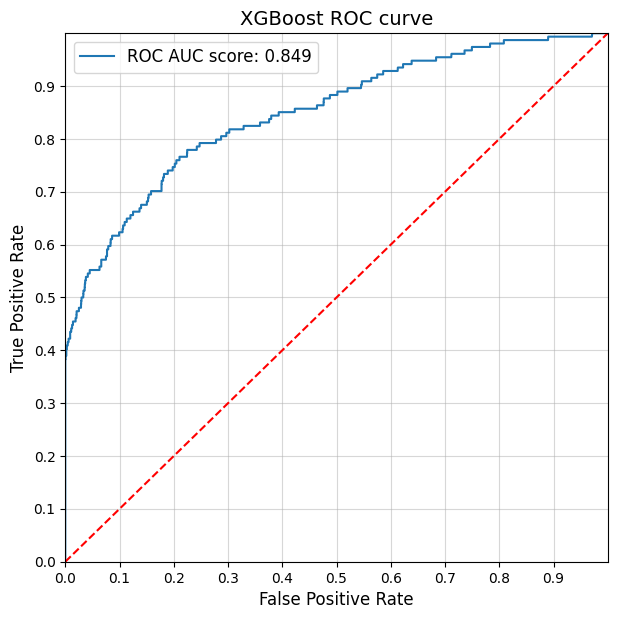

In [65]:
plot_roc_curve(xgb_clf, X_test, y_test, 'XGBoost')

#### Опеределим важность дескрипторов

<AxesSubplot:title={'center':'Features Importance'}>

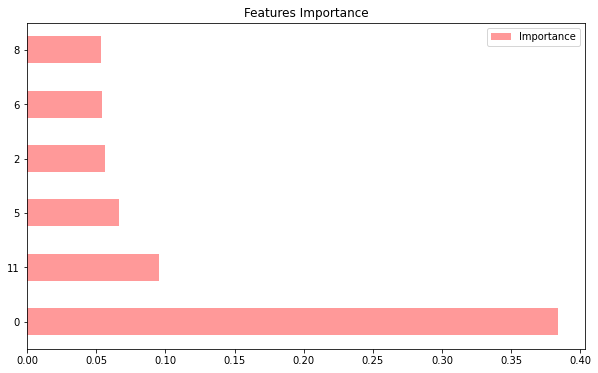

In [66]:
xgb_features_importance = pd.DataFrame({'Feature' : X_columns,
                                        'Importance' : xgb_clf.feature_importances_})\
                                        .sort_values(by='Importance', ascending=False)

xgb_features_importance[:6].plot(kind='barh',
                                  figsize=(10,6),
                                  title='Features Importance', color=['r'], alpha=.4)

### Подведем итоги для трех моделей

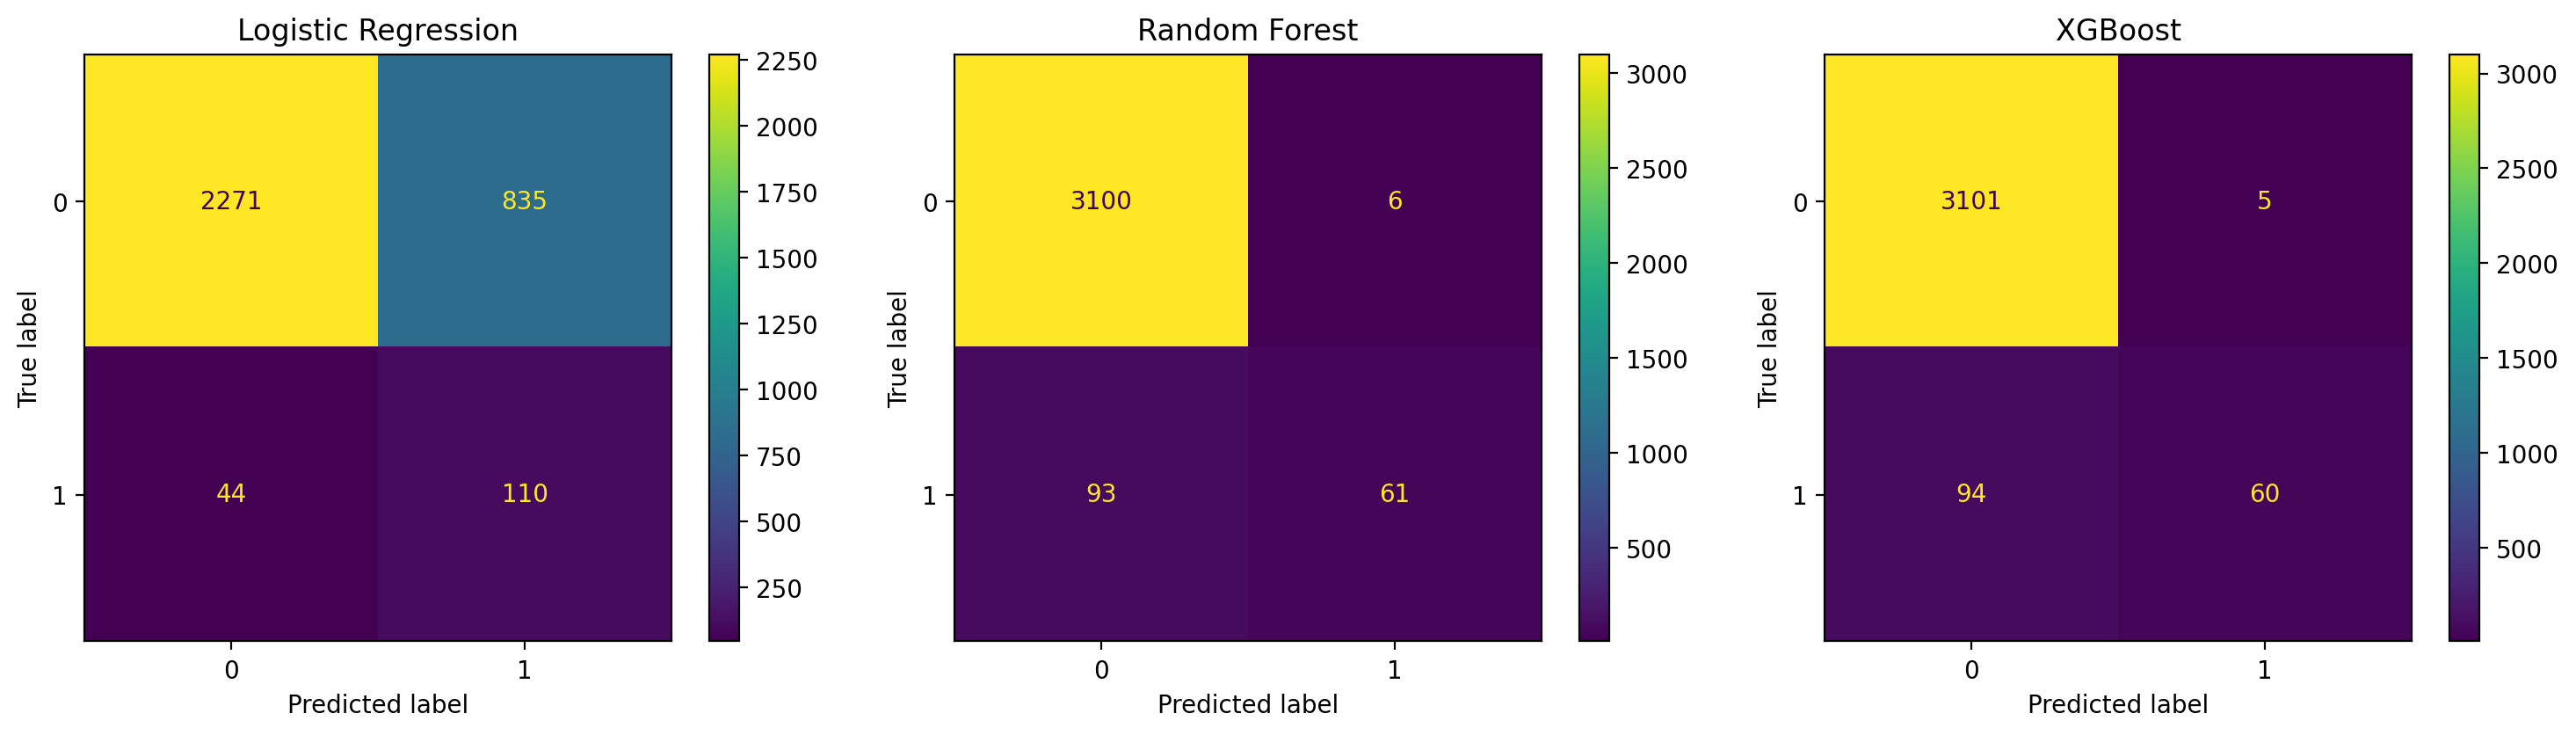

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4), dpi=200)
plot_confusion_matrix(clf_logreg, X_test, y_test, ax=ax[0])
ax[0].set_title('Logistic Regression')
plot_confusion_matrix(rf_clf, X_test, y_test, ax=ax[1])
ax[1].set_title('Random Forest')
plot_confusion_matrix(xgb_clf, X_test, y_test, ax=ax[2])
ax[2].set_title('XGBoost')
plt.tight_layout()  

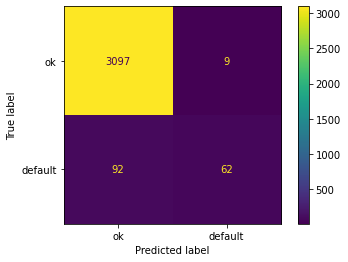

In [68]:
porog = 0.420
y_pred_xgb_porog = np.where(y_proba_xgb > porog, 1, 0)
cm_xgb = confusion_matrix(y_test, y_pred_xgb_porog)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['ok', 'default'])
disp.plot();

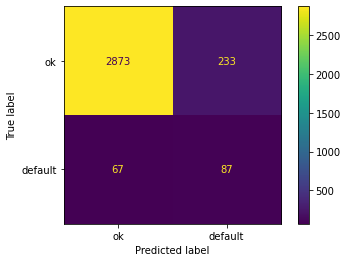

In [69]:
porog = 0.08
y_pred_porog = np.where(y_proba > porog, 1, 0)
cm_rf = confusion_matrix(y_test, y_pred_porog)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['ok', 'default'])
disp.plot();

In [70]:
print('-'*22 + '\nLogistic Regression')
print_results(y_train_pred, y_test_pred)
print('-'*22 + '\nRandom Forest')
print_results(y_train_pred_rf, y_test_pred_rf)
print('-'*22 + '\nXGBoost')
print_results(y_train_pred_xgb, y_test_pred_xgb)

----------------------
Logistic Regression
Recall
Train :  0.713
Test  :  0.714

F1 score
Train :  0.198
Test  :  0.200

----------------------
Random Forest
Recall
Train :  0.502
Test  :  0.396

F1 score
Train :  0.669
Test  :  0.552

----------------------
XGBoost
Recall
Train :  0.498
Test  :  0.390

F1 score
Train :  0.661
Test  :  0.548

